In [1]:
# House Price Prediction using Linear Regression

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Step 2: Create the Dataset

data = {
    'Area': [1000, 1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000, 5500],
    'Bedrooms': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'Bathrooms': [1, 2, 2, 3, 3, 3, 4, 4, 5, 5],
    'Floors': [1, 1, 2, 2, 2, 3, 3, 3, 3, 4],
    'Location_Index': [1, 2, 2, 3, 3, 4, 4, 5, 5, 5],
    'Price': [200000, 250000, 280000, 350000, 400000, 450000, 500000, 550000, 600000, 650000]
}

df = pd.DataFrame(data)
print("Here's our dataset:")
display(df)

Here's our dataset:


,Area,Bedrooms,Bathrooms,Floors,Location_Index,Price
0,1000,2,1,1,1,200000
1,1500,3,2,1,2,250000
2,1800,3,2,2,2,280000
3,2400,4,3,2,3,350000
4,3000,4,3,2,3,400000
5,3500,5,3,3,4,450000
6,4000,5,4,3,4,500000
7,4500,6,4,3,5,550000
8,5000,6,5,3,5,600000
9,5500,7,5,4,5,650000


In [3]:
# Step 3: Check Basic Info about the Dataset
print("Dataset Shape:", df.shape)
print("\nStatistical Summary:\n")
print(df.describe())

Dataset Shape: (10, 6)

Statistical Summary:

              Area   Bedrooms  Bathrooms     Floors  Location_Index  \
count    10.000000  10.000000  10.000000  10.000000       10.000000   
mean   3220.000000   4.500000   3.200000   2.400000        3.400000   
std    1538.975128   1.581139   1.316561   0.966092        1.429841   
min    1000.000000   2.000000   1.000000   1.000000        1.000000   
25%    1950.000000   3.250000   2.250000   2.000000        2.250000   
50%    3250.000000   4.500000   3.000000   2.500000        3.500000   
75%    4375.000000   5.750000   4.000000   3.000000        4.750000   
max    5500.000000   7.000000   5.000000   4.000000        5.000000   

               Price  
count      10.000000  
mean   423000.000000  
std    153336.956479  
min    200000.000000  
25%    297500.000000  
50%    425000.000000  
75%    537500.000000  
max    650000.000000  


In [4]:
# Step 4: Define Features (X) and Target (y)
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Location_Index']]
y = df['Price']

print("Features and Target separated successfully!")

Features and Target separated successfully!


In [5]:
# Step 5: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(" Training samples:", X_train.shape[0])
print(" Testing samples:", X_test.shape[0])

 Training samples: 7
 Testing samples: 3


In [6]:
# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print(" Model Trained Successfully!")
print("\nIntercept (b):", model.intercept_)
print("Coefficients (m values):", model.coef_)

 Model Trained Successfully!

Intercept (b): 91249.99999999983
Coefficients (m values): [   85.22727273  9659.09090909  9886.36363636 -4772.72727273
 -1590.90909091]


In [8]:
# Step 7: Make Predictions on the Test Set
y_pred = model.predict(X_test)

results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

print("Predictions vs Actual Results:")
display(results)

Predictions vs Actual Results:


,Actual Price,Predicted Price
8,600000,602500.000000
1,250000,259886.363636
5,450000,446818.181818


In [9]:
# Step 8: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 5189.39
R² Score: 1.00


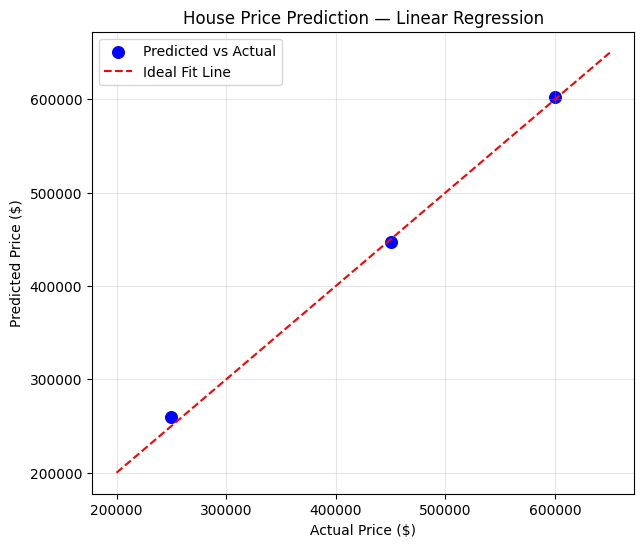

In [13]:
# Step 9: Visualize Predicted vs Actual Prices
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, color='blue', s=70, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("House Price Prediction — Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# Step 10: Predict the Price for a New House
new_house = np.array([[3200, 4, 3, 2, 4]])  # [Area, Bedrooms, Bathrooms, Floors, Location_Index]
predicted_price = model.predict(new_house)
print(f" Predicted price for the new house: ${predicted_price[0]:,.0f}")

 Predicted price for the new house: $416,364


C:\Users\bhava\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Small house in a basic location
new_house1 = pd.DataFrame({
    'Area': [1200],
    'Bedrooms': [2],
    'Bathrooms': [1],
    'Floors': [1],
    'Location_Index': [1]
})

pred_price1 = model.predict(new_house1)
print(f"Predicted price for a small starter home: ${pred_price1[0]:,.0f}")

Predicted price for a small starter home: $216,364
